# Data Reduction 1

***
**Sanity Check / Merging**

- Same routine for all the samples
- Perform for all Samples (16/08/2022)
***

## <u>Library</u>

<div class="alert alert-block alert-success">
<b>Usefull note:</b> <br>
    - If need be, modify 
    %matplotlib inline par %matplotlib notebook
    <br>
    Doesn't really work though
</div>

In [163]:
import numpy 
import math
from math import isnan
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors
import pandas as pd
import glob
from functools import reduce
import ipywidgets as widgets
import matplotlib.gridspec as gridspec
from datetime import datetime
from IPython.core.display import SVG

%matplotlib inline


## <u>Input Parameters</u>

$\color{red}{\text{Implement manually !}}$

In [332]:
# 0.1 Date
date = "2021_01_21"

date2 = date.replace("_", "")

# 0.2 XP
XP = "XP_1-1"
# for the notebook folder architecture that I setted up wrong
XP2 = "XP-1_1" 

# 0.3 Sample type
spl = "ASW"

# 0.4 Deposition Temperature
#Tdep = "20"

In [333]:
#print(date2)

## <u>Import and read the Data</u>

+ import background data
    - unsmoothed data ?
 

In [334]:
BKG = pd.read_csv("..\..\Data\DATA_RAW\{}\BG{}_01.csv".format(date,date2), names=["Wavenumber", "scan"])

FileNotFoundError: [Errno 2] No such file or directory: '..\\..\\Data\\DATA_RAW\\2021_01_21\\BG20210121_01.csv'

In [335]:
BKG .head(10)

,Wavenumber,scan
0,799.8442,0.223606
1,800.3264,0.218471
2,800.8085,0.228426
3,801.2906,0.225436
4,801.7727,0.238846
5,802.2549,0.236217
6,802.7370,0.249293
7,803.2191,0.243437
8,803.7012,0.253749
9,804.1833,0.245739


### <u>Smoothed Scan</u>

Loop through all the files and extract:
- ...
- ...

In [336]:
file_path = "..\..\Data\DATA_RAW\{}\*_smooth.csv".format(date)

# List within which all the individual scans will be added prior to merging
All_data_frame = []

# List where all the "data annex" (ie max absorbance ...), will be stored 
data_anex = []

#Temperature Ramp that the sample experienced (need to be entered manually later)
T_ramp = []

# Data annex values
data_max = []
minimum_1 = []
minimum_1_index = []
minimum_2 = []
minimum_2_index = []
minimum_3 = []
minimum_3_index = []
minimum_4 = []
minimum_4_index = []
minimum_5 = []
minimum_5_index = []
minimum_6 = []
minimum_6_index = []

maximum = []
maximum_index = []

# iterator

file_number = 1

#for loop

for file in glob.glob(file_path):

    df = pd.read_csv(file, names=["Wavenumber", str(spl)+"_"+str(date)+"_"+str(file_number)])
    
    All_data_frame.append(df) 

    #Min 4000 - 3800 wavenumber
    
    min1 = df.iloc[6223:6639,1].astype(float).min()
    min1_index= df.iloc[6223:6639,1].astype(float).idxmin()
    
    #Min 3000 - 2800 wavenumber
    
    min2 = df.iloc[4149:4564,1].astype(float).min()
    min2_index = df.iloc[4149:4564,1].astype(float).idxmin()
    
    #Min 2800 - 2700 wavenumber
    
    min3 = df.iloc[3941:4149,1].astype(float).min()
    min3_index= df.iloc[3941:4149,1].astype(float).idxmin()
    
    #Min 2000 - 1900 wavenumber
    
    min4 = df.iloc[2282:2490,1].astype(float).min()
    min4_index = df.iloc[2282:2490,1].astype(float).idxmin()
    
    #Min 2800 - 2700 wavenumber
    
    min3 = df.iloc[3941:4149,1].astype(float).min()
    min3_index= df.iloc[3941:4149,1].astype(float).idxmin()
    
    #Min 2000 - 1900 wavenumber
    
    min4 = df.iloc[2282:2490,1].astype(float).min()
    min4_index = df.iloc[2282:2490,1].astype(float).idxmin()
    
    #Min 1900 - 1800 wavenumber
    
    min5 = df.iloc[2075:2282,1].astype(float).min()
    min5_index= df.iloc[2075:2282,1].astype(float).idxmin()
    
    #Min 1300 - 800 wavenumber
    
    min6 = df.iloc[0:1038,1].astype(float).min()
    min6_index = df.iloc[0:1038,1].astype(float).idxmin()
    
    maxi = df.iloc[4149:6639,1].astype(float).max()
    maxi_index= df.iloc[4149:6639,1].astype(float).idxmax()
    

    #Wavenumber.append(Wav)    
    #RAW_data.append(RAW)
    
    minimum_1.append(min1)
    minimum_1_index.append(min1_index)
    
    minimum_2.append(min2)
    minimum_2_index.append(min2_index)
    
    minimum_3.append(min3)
    minimum_3_index.append(min3_index)
    
    minimum_4.append(min3)
    minimum_4_index.append(min3_index)
    
    minimum_5.append(min5)
    minimum_5_index.append(min5_index)
    
    minimum_6.append(min6)
    minimum_6_index.append(min6_index)
    
    maximum.append(maxi)
    maximum_index.append(maxi_index)
        
    data_anex.append(
        
        {

            'Name' : str(spl)+"_"+str(date)+"_" + str(file_number),
            'min1' : min1,
            'index1' :  min1_index,
            'min2' : min2,
            'index2' :  min2_index,
            'min3' : min3,
            'index3' :  min3_index,
            'min4' : min4,
            'index4' :  min4_index,
            'min5' : min5,
            'index5' :  min5_index,
            'min6' : min6,
            'index6' :  min6_index,
            'max' : maxi,
            'max_index' :  maxi_index,
        })
    

    file_number +=1

### Sanity check

Check that the list has the same number of scans, and that every scan has 6639 rows

In [337]:
#All_data_frame

#data_anex

In [338]:
data_anex_df = pd.DataFrame(data_anex)

data_anex_df.head(5)

,Name,min1,index1,min2,index2,min3,index3,min4,index4,min5,index5,min6,index6,max,max_index
0,ASW_2021_01_21_1,-0.081181,6334,-0.076551,4353,-0.075345,4132,-0.055401,2464,-0.054687,2165,-0.028153,978,0.450123,5101
1,ASW_2021_01_21_2,-0.083689,6334,-0.077057,4343,-0.075760,4140,-0.055798,2464,-0.055636,2165,-0.028405,978,0.451424,5099


##  <u>Concatenation </u>

In [339]:
All_RAW_df = reduce(lambda left,right: pd.merge(left,right, on=['Wavenumber'],how='outer'), All_data_frame)

pd.DataFrame(All_RAW_df)

#All_RAW_df 

,Wavenumber,ASW_2021_01_21_1,ASW_2021_01_21_2
0,799.8442,0.061711,0.060822
1,800.3264,0.065291,0.065700
2,800.8085,0.068158,0.069098
3,801.2906,0.062389,0.063721
4,801.7727,0.057429,0.058963
...,...,...,...
6634,3998.2570,-0.067021,-0.067538
6635,3998.7390,-0.066906,-0.067417
6636,3999.2210,-0.066742,-0.067265
6637,3999.7030,-0.067142,-0.067644


### CSV Export



In [340]:
# All_RAW_df

All_RAW_df.to_csv("..\..\Data\DATA_PROCESSING\{}\Data\DR1_{}_All-scans.csv".format(date,date))

# data_annex

data_anex_df.to_csv("..\..\Data\DATA_PROCESSING\{}\Data\DR1_{}_data_annex.csv".format(date,date))

## <u> Plotting </u>

3


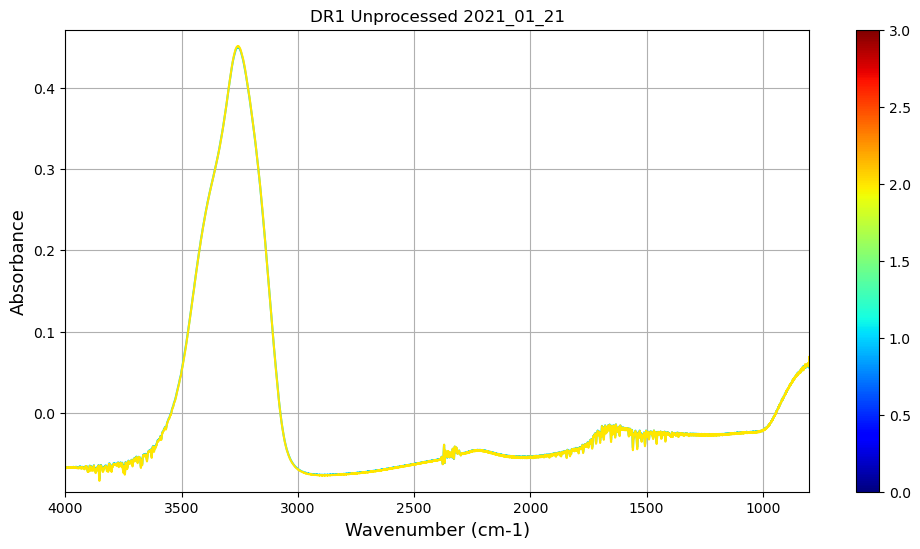

In [341]:
nscan = len(list(All_RAW_df.columns.values.tolist()))
ymax = data_anex_df.iloc[1:,13].astype(float).max() + 0.02
ymin = data_anex_df.iloc[1:,3].astype(float).min() - 0.02

print(nscan)


fig= plt.figure(figsize=(12,6))


normalize = mcolors.Normalize(vmin=0, vmax=nscan)
colormap = cm.jet
i=1

for i in range(1,nscan):
    
    plt.plot(All_RAW_df.Wavenumber, All_RAW_df['{}_{}_{}'.format(spl, date, i)], color=colormap(normalize(i)))
    
    i=+1
    

plt.title('DR1 Unprocessed {0}'.format(date))
plt.axis([4000,800,ymin,ymax])
plt.xlabel('Wavenumber (cm-1)').set_fontsize(13)
plt.ylabel('Absorbance').set_fontsize(13)
#ax = fig.gca()
plt.grid()
#plt.legend()

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nscan)
plt.colorbar(scalarmappaple)

# Into proper Data_Processing folder

plt.savefig('..\..\Data\DATA_PROCESSING\{}\Plots\DR1_{}_Full-range.png'.format(date, date))

# Also into Data Notes folder

#plt.savefig('../../Notes/Data_Notes/{}/{}/Plots/DR/DR1_{}_Full-range.png'.format(XP2, date, date))

plt.show()

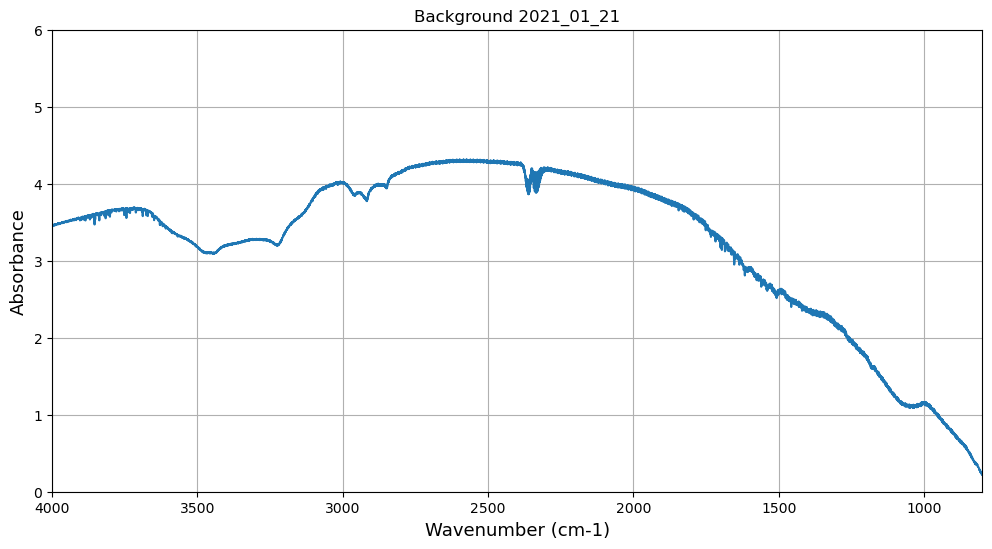

In [342]:
fig= plt.figure(figsize=(12,6))

plt.plot(BKG.Wavenumber, BKG.scan)

plt.title('Background {0}'.format(date))
plt.axis([4000,800,0,6])
plt.xlabel('Wavenumber (cm-1)').set_fontsize(13)
plt.ylabel('Absorbance').set_fontsize(13)
#ax = fig.gca()
plt.grid()

# Into proper Data_Processing folder

plt.savefig('..\..\Data\DATA_PROCESSING\{}\Plots\BKG_{}.png'.format(date, date))

# Also into Data Notes folder

#plt.savefig('../../Notes/Data_Notes/{}/{}/Plots/DR/DR1_{}_Full-range.png'.format(XP2, date, date))

plt.show()

***

<img style="float: right;" src="..\..\Docs\Logo_work_in_progress.svg" alt="logo" width="160px"/>

## About this notebook

**Updated On:** 2022-08-24 


**Author:** Vincent Deguin, PhD Student.
<br>
 **Contact:** vincent.deguin@open.ac.uk  



# Extra Plots 

(and stuffs)

3


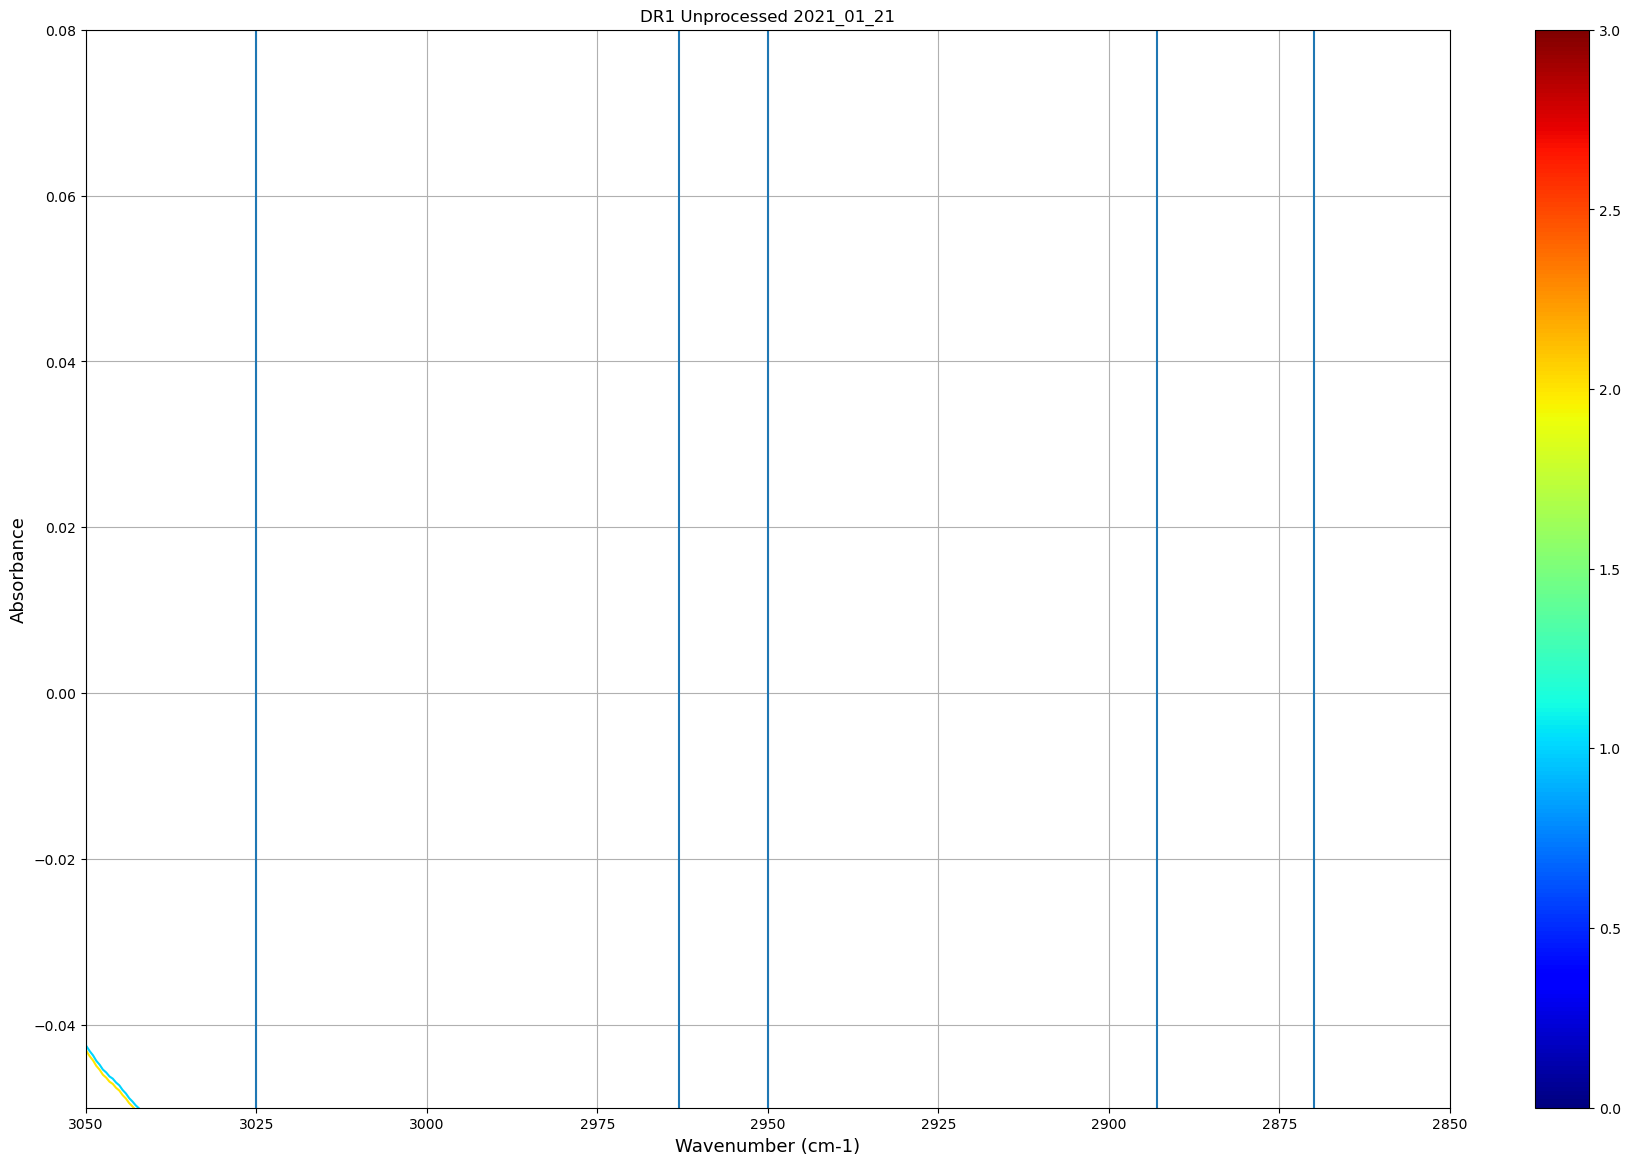

In [343]:
nscan = len(list(All_RAW_df.columns.values.tolist()))

print(nscan)


fig= plt.figure(figsize=(22,14))


normalize = mcolors.Normalize(vmin=0, vmax=nscan)
colormap = cm.jet
i=1

for i in range(1,nscan):
    
    plt.plot(All_RAW_df.Wavenumber, All_RAW_df['{}_{}_{}'.format(spl, date, i)], color=colormap(normalize(i)))
    
    i=+1
    

plt.title('DR1 Unprocessed {0}'.format(date))
plt.axis([3050,2850,-0.05,0.08])
plt.axvline([3025])
plt.axvline([2963])
plt.axvline([2950])
plt.axvline([2893])
plt.axvline([2870])
plt.xlabel('Wavenumber (cm-1)').set_fontsize(13)
plt.ylabel('Absorbance').set_fontsize(13)
#ax = fig.gca()
plt.grid()
#plt.legend()

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nscan)
plt.colorbar(scalarmappaple)

# Into proper Data_Processing folder

#plt.savefig('..\..\DATA\DATA-Processing\PAC\{}/Samples/{}/Plots/DR/DR1_{}_Ethane-range.png'.format(XP, date, date))

# Also into Data Notes folder

#plt.savefig('../../Notes/Data_Notes/{}/{}/Plots/DR/DR1_{}_Ethane-range.png'.format(XP2, date, date))

plt.show()

## Comparing 2 smoothing routines

In [3]:
scan_Omnic = pd.read_csv("..\..\Data\DATA_RAW\{}\ASW_{}_0001_smooth.csv".format(date,date), names=["Wavenumber", "Scan"])
scan_SPY = pd.read_csv("..\..\Data\DATA_PROCESSING\{}\Data\ASW_2020_09_18_0001_smoothSPY.csv".format(date), names=["Wavenumber", "Scan"])

scan_SPY = scan_SPY.iloc[1: , :]

In [4]:
scan_SPY

,Wavenumber,Scan
1,4000.185302734375,-0.025953737397988633
2,3999.7031784402425,-0.02595914639532566
3,3999.2210541461095,-0.025952191278338435
4,3998.738929851977,-0.025956087311108905
5,3998.256805557844,-0.025942546750108396
...,...,...
6635,801.772735457781,0.05006797884901365
6636,801.290611163648,0.0500907709201177
6637,800.8084868695155,0.05018279279271762
6638,800.3263625753825,0.05021406585971514


In [5]:
scan_Omnic

,Wavenumber,Scan
0,799.8442,0.051730
1,800.3264,0.048630
2,800.8085,0.051568
3,801.2906,0.048521
4,801.7727,0.051516
...,...,...
6634,3998.2570,-0.025760
6635,3998.7390,-0.026135
6636,3999.2210,-0.025636
6637,3999.7030,-0.026306


## If trouble 

when itereting through the sample, way to find the corrupted ones (not the right amount of colums)

In [162]:
#file_path = "..\..\Data\DATA_RAW\{}\*_smooth.csv".format(date)

#file_number = 1

#for file in glob.glob(file_path):

#    df = pd.read_csv(file, names=["Wavenumber", str(spl)+"_"+str(date)+"_"+str(file_number)])
    
#    print(df)
    
#    file_number +=1